## **CA04 Assignment**
By: *Kyle Rauscher*


#1. Data Sources and Content

In [1]:
#import necessary and used packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier 
import xgboost as xgb 
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

In [2]:
#read data from github link
df = pd.read_csv("https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true")

In [3]:
# print the DataFrame's shape
print(df.shape)

(48842, 11)


In [4]:
# print the DataFrame's data types
print(df.dtypes)

hours_per_week_bin    object
occupation_bin        object
msr_bin               object
capital_gl_bin        object
race_sex_bin          object
education_num_bin     object
education_bin         object
workclass_bin         object
age_bin               object
flag                  object
y                      int64
dtype: object


In [5]:
#see examples of the first few rows
df.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0


In [6]:
#split the dataset into the training set and the test set
train_data=df[df['flag']=='train']
test_data=df[df['flag']=='test']
print(train_data.shape)
print(test_data.shape)

(32561, 11)
(16281, 11)


In [7]:
#encoding the x and y categorical varaibles into discrete values using hot encoding
x_train = pd.get_dummies(train_data[['hours_per_week_bin','occupation_bin','msr_bin',
                                     'capital_gl_bin','race_sex_bin','education_bin','age_bin']], drop_first=True) #drop first to avoid multicolinearity
x_test = pd.get_dummies(test_data[['hours_per_week_bin','occupation_bin','msr_bin',
                                   'capital_gl_bin','race_sex_bin','education_bin','age_bin']], drop_first=True)
y_train=train_data['y']
y_test=test_data['y']

In [9]:
#check on the shape of the training dataset
x_train.shape

(32561, 22)

#2. Finding Optimal Value of a key Ensemble Method Hyperparameter

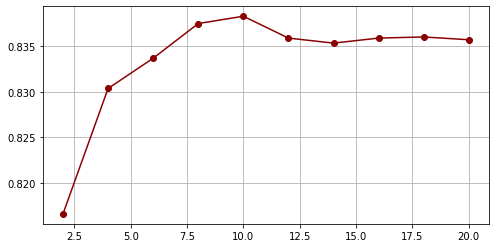

In [11]:
#Using the Decision Tree Classifier to determine the optimal max depth in regards to accuracy
from sklearn.tree import DecisionTreeClassifier

results = []
max_depth_options = [2,4,6,8,10,12,14,16,18,20]

for trees in max_depth_options:
  model = DecisionTreeClassifier(max_depth=trees, random_state=101)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  accuracy = np.mean(y_test==y_pred)
  results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, max_depth_options).plot(color='darkred',marker='o', grid=True)
plt.show()

We can see from the graph that a max depth of 10 will provide us a model with the highest accuracy out of the possible depths given in our list.



#3. Building a Random Forest Model

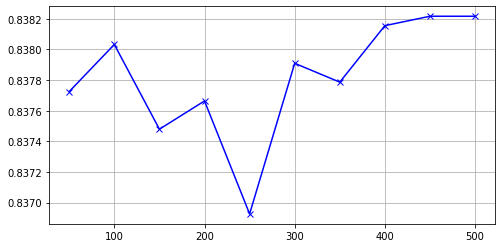

In [15]:
#RandomForestClassifier: N_Estimators vs Accuracy
#This code uses a Random Forrest Classifier to test and determine the optimal number of n_estimators based on accuracy
from sklearn.ensemble import RandomForestClassifier

rfc_results = []
n_estimator = [50,100,150,200,250,300,350,400,450,500]

for trees in n_estimator:
    rfc_model = RandomForestClassifier(n_estimators=trees, random_state=101)
    rfc_model.fit(x_train, y_train)
    y_pred = rfc_model.predict(x_test)
    accuracy = np.mean(y_test==y_pred)
    rfc_results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(rfc_results, n_estimator).plot(color='blue',marker='x', grid=True)
plt.show()

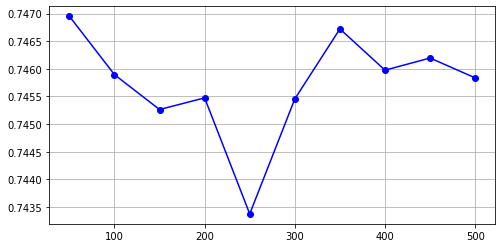

In [16]:
#RandomForestClassifier: N_Estimators vs AUC
#This code uses a Random Forrest Classifier to test and determine the optimal number of n_estimators but instead based on auc value
from sklearn.metrics import roc_auc_score

rfc_auc_results = []
n_estimator = [50,100,150,200,250,300,350,400,450,500]

for trees in n_estimator:
    rfc_model = RandomForestClassifier(n_estimators=trees, random_state=101)
    rfc_model.fit(x_train, y_train)
    y_pred = rfc_model.predict(x_test)
    auc = roc_auc_score(y_test, y_pred)
    rfc_auc_results.append(auc)

plt.figure(figsize=(8,4))
pd.Series(rfc_auc_results, n_estimator).plot(color='blue',marker='o', grid=True)
plt.show()

1. Write your observations about the Classifier’s behavior with respect to the number of estimators.

It is interesting that is the highest accuracy at 100, then it continues downward until it reaches 250 and then again continually steadily climbs through the rest of the estimators. For auc, we see a similiar tread where it initially has a high value, drops until 250 estimators, then steadily climbs. However where accuracy continued to climb through all the values, auc trends dowards again once it hits 350.

2. Is there an optimal value of the estimator within the given range?

To determine an optimal value, we could use the three highest accuracies, of 500, 450, and 400. We can also look at the 3 highest aucm 50, 350, and 450. As in this case we see that 450 has both a top 3 accuracy and auc value, it would be the best estimator.

#4. Building AdaBoost, Gradient Boost, and XGB

##ADABOOST

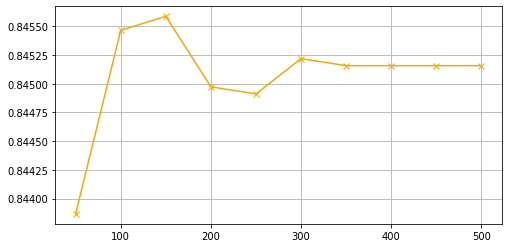

In [17]:
#AdaBoost: N_Estimators vs Accuracy
#This code uses AdaBoost to test and determine the optimal number of n_estimators based on accuracy
from sklearn.ensemble import AdaBoostClassifier

ada_results = []
n_estimator = [50,100,150,200,250,300,350,400,450,500]

for trees in n_estimator:
    ada_model = AdaBoostClassifier(n_estimators=trees, random_state=101)
    ada_model.fit(x_train, y_train)
    y_pred = ada_model.predict(x_test)
    accuracy = np.mean(y_test==y_pred)
    ada_results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(ada_results, n_estimator).plot(color='orange',marker='x', grid=True)
plt.show()

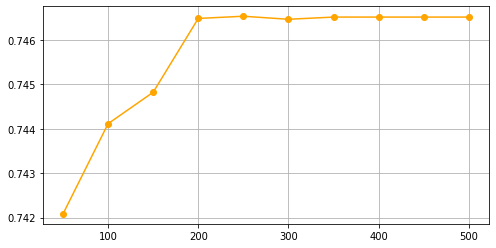

In [18]:
#AdaBoost: N_Estimators vs AUC
#This code uses a AdaBoost to test and determine the optimal number of n_estimators but instead based on auc value
ada_auc_results = []
n_estimator = [50,100,150,200,250,300,350,400,450,500]

for trees in n_estimator:
    ada_model = AdaBoostClassifier(n_estimators=trees, random_state=101)
    ada_model.fit(x_train, y_train)
    y_pred = ada_model.predict(x_test)
    auc = roc_auc_score(y_test, y_pred)
    ada_auc_results.append(auc)

plt.figure(figsize=(8,4))
pd.Series(ada_auc_results, n_estimator).plot(color='orange',marker='o', grid=True)
plt.show()

**ADABOOST**
1. Write your observations about the Classifier’s behavior with respect to the number of estimators.

Looking at adaboost accuracy we can see it has its highest peak at 150 estimators than heads downward and then hits a plateau at 300 after a slight increase. For auc we see it steadily climbs until it hits 200 estimators then hits a plateau for the rest of the estimator values.

2. Is there an optimal value of the estimator within the given range?

Based on the trends of AUC we would likely want anything above 200 estimators. Based on accuracy we can see 300 estimators would provide the highest accuracy for accuracies greater than 200. Therefore 300 wouold be the best for an AdaBoost model.

##Gradient Boosting Classifier

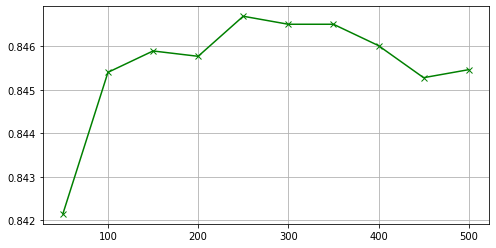

In [19]:
#Gradient Boosting Classifier: N_Estimators vs Accuracy
#This code uses Gradient Boosting Classifier to test and determine the optimal number of n_estimators based on accuracy
from sklearn.ensemble import GradientBoostingClassifier

gbc_results = []
n_estimator = [50,100,150,200,250,300,350,400,450,500]

for trees in n_estimator:
    gbc_model = GradientBoostingClassifier(n_estimators=trees, random_state=101)
    gbc_model.fit(x_train, y_train)
    y_pred = gbc_model.predict(x_test)
    accuracy = np.mean(y_test==y_pred)
    gbc_results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(gbc_results, n_estimator).plot(color='green',marker='x', grid=True)
plt.show()

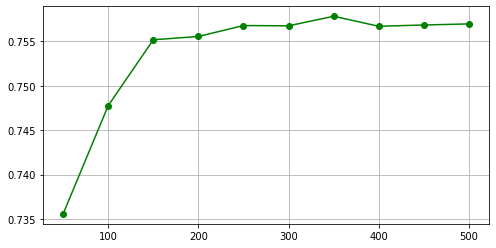

In [20]:
#Gradient Boosting Classifier: N_Estimators vs AUC
#This code uses a Gradient Boosting Classifier to test and determine the optimal number of n_estimators but instead based on auc value
gbc_auc_results = []
n_estimator = [50,100,150,200,250,300,350,400,450,500]

for trees in n_estimator:
    gbc_model = GradientBoostingClassifier(n_estimators=trees, random_state=101)
    gbc_model.fit(x_train, y_train)
    y_pred = gbc_model.predict(x_test)
    auc = roc_auc_score(y_test, y_pred)
    gbc_auc_results.append(auc)

plt.figure(figsize=(8,4))
pd.Series(gbc_auc_results, n_estimator).plot(color='green',marker='o', grid=True)
plt.show()

**Gradient Booster Classifier**

1. Write your observations about the Classifier’s behavior with respect to the number of estimators.

Looking at the accuracy of GBC on estimators, it increases to 250 estimators, then trends downward for the rest of the values. AUC value however, climbs to 150 and then plateaus with a slight increase over the rest of the estimators.

2. Is there an optimal value of the estimator within the given range?

As there is a plateau in auc after 150, we would want to choose a estimator value greater than that. As the highest accuracy occurs at 250, that would be the best number of estimators.

##XGB

In [33]:
#due to the naming conventions in the feature names xgb was unable to be performed without some additional steps
#The purpose of this step is to convert any comma-separated values in the dataframe to a more standardized format
import re

regex = re.compile(r"|<", re.IGNORECASE)
x_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in x_train.columns.values]
x_test.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in x_test.columns.values]

df=df.replace(', ','<',regex=True).astype(str)

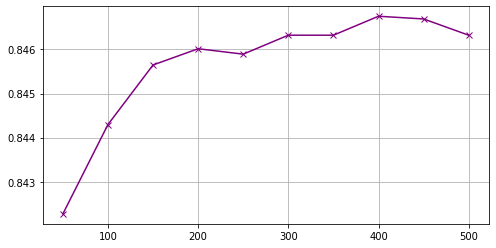

In [41]:
#XGB Boosting: N_Estimators vs Accuracy
#This code uses XGBoosting to test and determine the optimal number of n_estimators based on accuracy
xgb_results = []
n_estimator = [50,100,150,200,250,300,350,400,450,500]

for values in n_estimator:
  xgb_model = XGBClassifier(n_estimators=values, random_state=101)
  xgb_model.fit(x_train, y_train)
  y_pred = xgb_model.predict(x_test)
  accuracy = np.mean(y_test==y_pred)
  xgb_results.append(accuracy)


plt.figure(figsize=(8,4))
pd.Series(xgb_results, n_estimator).plot(color='purple', marker = 'x',grid=True)
plt.show()

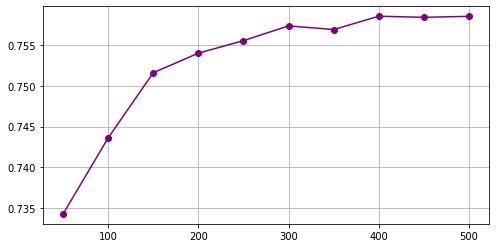

In [42]:
#XGB Boosting: N_Estimators vs AUC
#This code uses a XGBoosting to test and determine the optimal number of n_estimators but instead based on auc value
xgb_auc_results = []
n_estimator = [50,100,150,200,250,300,350,400,450,500]

for values in n_estimator:
  xgb_model = XGBClassifier(n_estimators=values, random_state=101)
  xgb_model.fit(x_train, y_train)
  y_pred = xgb_model.predict(x_test)
  auc = roc_auc_score(y_test, y_pred)
  xgb_auc_results.append(auc)

plt.figure(figsize=(8,4))
pd.Series(xgb_auc_results, n_estimator).plot(color='purple', marker = 'o',grid=True)
plt.show()

**XGB**

1. Write your observations about the Classifier’s behavior with respect to the number of estimators.

From our accuracy graph we can see there is a steady increase until 400 then from there has a slight decline after the peak. For the auc we can see there is a once again a similar trend of a slight increase to 400 then a slight plateau afterward.

2. Is there an optimal value of the estimator within the given range?

As from looking at the two graphs, we can see that both either peak at 400 or plateau beginning at 400. Because of this we can conclude 400 would be the best estimator.

#5. Comparing Performance

The final step is to take the final accuracy and auc score of each of the four models previously created in the steps above. This time we will run the model again but using the optimal number of estimators found for each of the models above. We will also continue using the random state of 101 that has been used throughout each model.

In [36]:
#Random Forest Classifier
rfc_model = RandomForestClassifier(random_state = 101, n_estimators = 450)
rfc_model.fit(x_train, y_train)
y_pred = rfc_model.predict(x_test)
                        
rfc_acc = np.mean(y_test==y_pred).round(4)
rfc_auc = roc_auc_score(y_test, y_pred).round(4)

In [37]:
#AdaBoost
ada_model = AdaBoostClassifier(random_state =101, n_estimators = 300)
ada_model.fit(x_train, y_train)
y_pred = ada_model.predict(x_test)

ada_acc = np.mean(y_test==y_pred).round(4)
ada_auc = roc_auc_score(y_test, y_pred).round(4)

In [38]:
#Gradient Boosting Classifier
gbc_model = GradientBoostingClassifier(random_state =101, n_estimators = 250)
gbc_model.fit(x_train, y_train)
y_pred = gbc_model.predict(x_test)

gbc_acc = np.mean(y_test==y_pred).round(4)
gbc_auc = roc_auc_score(y_test, y_pred).round(4)

In [39]:
#XGB
xgb_model = XGBClassifier(random_state=101, n_estimators=400)
xgb_model.fit(x_train, y_train)
y_pred = xgb_model.predict(x_test)

xgb_acc = np.mean(y_test==y_pred).round(4)
xgb_auc = roc_auc_score(y_test, y_pred).round(4)

Lastly we create an output table that displays the accuracy score and auc value.

In [40]:
#create a pandas Data Frame of all of the values collected from running the models with the best number of estimators
acc_vs_auc = pd.DataFrame(
     {'Random Forest': [rfc_acc, rfc_auc],
      'AdaBoost': [ada_acc, ada_auc],
      'Gradient Boost': [gbc_acc, gbc_auc],
      'XGB': [xgb_acc, xgb_auc]},
      index=['Accuracy', 'AUC'])

print(acc_vs_auc)

          Random Forest  AdaBoost  Gradient Boost     XGB
Accuracy         0.8382    0.8452          0.8467  0.8468
AUC              0.7462    0.7465          0.7568  0.7585


**Conclusion**

From all of the models, we can see that not only did XGB have the best accuracy of .8468 but it also had the best AUC as well of .7585 . 